In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from src.paths import processed_data_path,repo_path

In [2]:
#Altimetry Data
df = pd.read_csv(f'{repo_path}CFM_Lancaster/data/altimetry/cs2_summit.csv',index_col=0)
df[f"Cum. Ele. Change since {round(df.Year[0],2)}"] = df.Data - df.Data[0]
#IMAU Data
ds_imau = xr.open_dataset(f'{processed_data_path}IMAU_Output/imau_station_data.nc')
ds_imau = ds_imau.rename({'zs':'cum_ele'})
#CFM Data
ds_cfm = xr.open_dataset(f'{repo_path}CFM_Lancaster/results/Single_Dimension_CFM_Output.nc')

In [3]:
#Subsetting IMAU to same time start point as altimetry data.
ds_imau_subset = ds_imau.sel(time=slice(df.Year[0],None,None)).sel(station='Summit')
ds_imau_subset['cum_ele'] = ds_imau_subset.cum_ele-ds_imau_subset.cum_ele[0]

#Subsetting CFM to same time start point as altimetry data.
ds_cfm_subset = ds_cfm.swap_dims({'time':'year'}).sel(year=slice(df.Year[0],None,None)).sel(station='Summit')
ds_cfm_subset['cum_ele'] = ds_cfm_subset.depth_lowest-ds_cfm_subset.depth_lowest[0]

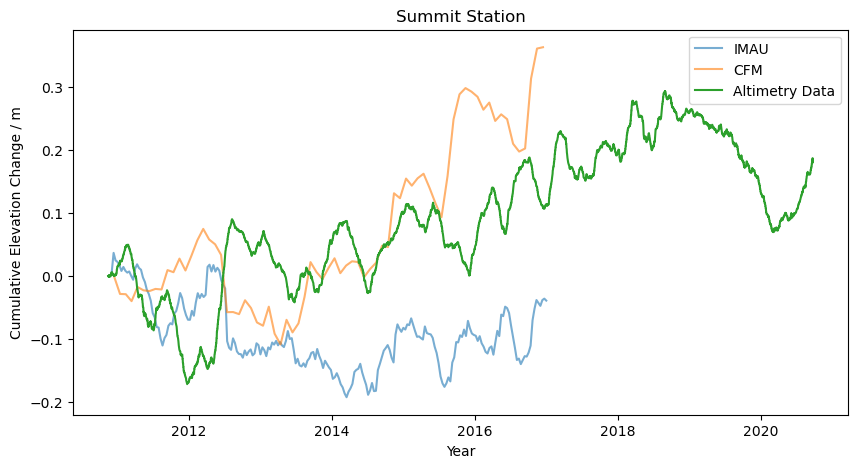

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ds_imau_subset['cum_ele'].plot.line(x='time',alpha=0.6,label='IMAU',ax=ax)
ds_cfm_subset['cum_ele'].plot.line(x='year',alpha=0.6,label='CFM',ax=ax)
df.plot(x='Year',y='Cum. Ele. Change since 2010.88',ax=ax,label='Altimetry Data')
plt.ylabel('Cumulative Elevation Change / m')
plt.title('Summit Station')
plt.legend()